In [1]:
from google.colab import files
uploaded = files.upload()


Saving Coffe_sales.csv to Coffe_sales.csv


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Coffe_sales.csv')

In [21]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())
print("Shape after removing duplicates:", df.shape)


Duplicates before: 0
Duplicates after: 0
Shape after removing duplicates: (3547, 11)


In [22]:
print(df.isnull().sum())
df['money'] = df['money'].fillna(df['money'].mean())
df['cash_type'] = df['cash_type'].fillna(df['cash_type'].mode()[0])


hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [23]:
import numpy as np

# Z-score method (example on money)
from scipy import stats
z_scores = np.abs(stats.zscore(df['money']))
df = df[(z_scores < 3)]  # keep values within 3 std deviations

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (3547, 11)


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df[['hour_of_day','money','Weekdaysort','Monthsort']] = scaler.fit_transform(
    df[['hour_of_day','money','Weekdaysort','Monthsort']]
)




In [25]:
df = pd.get_dummies(df, columns=['cash_type','coffee_name','Time_of_Day','Weekday','Month_name'], drop_first=True)


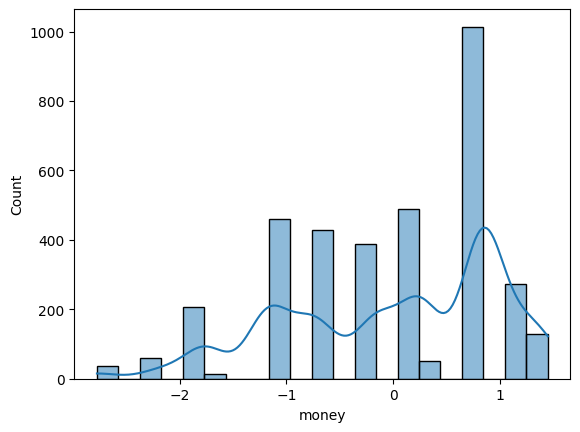

NameError: name 'file_path' is not defined

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical column
sns.histplot(df['money'], kde=True)
plt.show()

# Countplot for categorical (before encoding!)
sns.countplot(x="coffee_name", data=pd.read_csv("Coffe_sales.csv"))
plt.xticks(rotation=45)
plt.show()



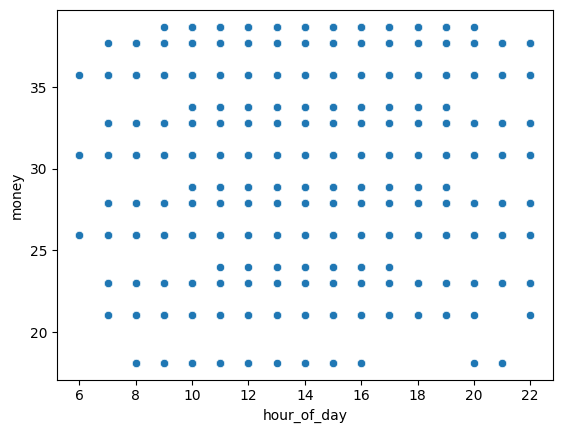

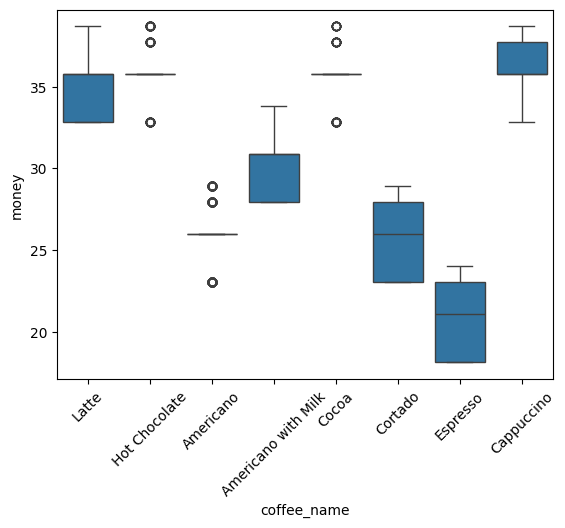

In [30]:
# Scatter plot between money and hour_of_day
sns.scatterplot(x="hour_of_day", y="money", data=pd.read_csv("Coffe_sales.csv"))
plt.show()

# Boxplot between coffee type and money
sns.boxplot(x="coffee_name", y="money", data=pd.read_csv("Coffe_sales.csv"))
plt.xticks(rotation=45)
plt.show()
